In [ ]:
!pip install transformers torch pandas matplotlib
!pip install wordcloud
from wordcloud import WordCloud


In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
# Modelo de BETO para análisis de sentimientos en español
modelo = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(modelo)
modelo_beto = AutoModelForSequenceClassification.from_pretrained(modelo)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
def analizar_sentimiento(texto):
    # Tokenizar el texto para que el modelo lo entienda
    inputs = tokenizer(texto, return_tensors="pt", truncation=True, padding=True, max_length=512)

    # Realizar la predicción sin actualizar pesos (no entrenamos, solo inferimos)
    with torch.no_grad():
        outputs = modelo_beto(**inputs)

    logits = outputs.logits
    prediccion = torch.argmax(logits, dim=1).item()

    # Mapear la predicción a etiquetas de sentimiento
    etiquetas = {
        0: "Muy negativo",
        1: "Negativo",
        2: "Neutral",
        3: "Positivo",
        4: "Muy positivo"
    }

    return etiquetas.get(prediccion, "Desconocido")


In [ ]:
#load file and extract keys from twitter
from google.colab import files
uploaded = files.upload()


Saving sentiment_data.csv to sentiment_data.csv


In [ ]:
#Get the data from the file
#store the csv file to some variable
df = pd.read_csv('sentiment_data.csv')
print(df.head())

  month    year   fuente sentimiento  response              empresa  \
0     .  2011.0  memoria    positivo       1.0  banco internacional   
1     .  2009.0  memoria    negativo       0.0                  bci   
2     .  2018.0  memoria    positivo       1.0                  bci   
3     .  2012.0  memoria    positivo       1.0           bupa chile   
4     .  2013.0  memoria    positivo       1.0           bupa chile   

                                               texto  
0  En cuanto a las colocaciones, estas alcanzaron...  
1  En el año 2009 el mundo enfrentó una crisis fi...  
2  Es para mí motivo de gran satisfacción compart...  
3  Si tuviera que resumir la gestión 2012 de Cruz...  
4  El crecimiento anteriormente mencionado redund...  


In [ ]:
# Seleccionar solo la columna de texto y eliminar filas vacías
df = df[['texto']].dropna()

In [ ]:
import re
import unicodedata

def clean_text(text):
    text = str(text)  # Asegurar que sea string
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Eliminar menciones
    text = re.sub(r'#', '', text)  # Eliminar hashtags
    text = re.sub(r'RT[\s]+', '', text)  # Eliminar RT
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Eliminar URLs
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar signos de puntuación
    text = text.lower()  # Convertir a minúsculas
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')  # Quitar acentos
    return text

# Aplicar limpieza
df['Cleaned_Text'] = df['texto'].apply(clean_text)


In [ ]:
!pip install swifter

import swifter
df['Sentimiento'] = df['Cleaned_Text'].swifter.apply(analizar_sentimiento)

Pandas Apply:   0%|          | 0/1461 [00:00<?, ?it/s]

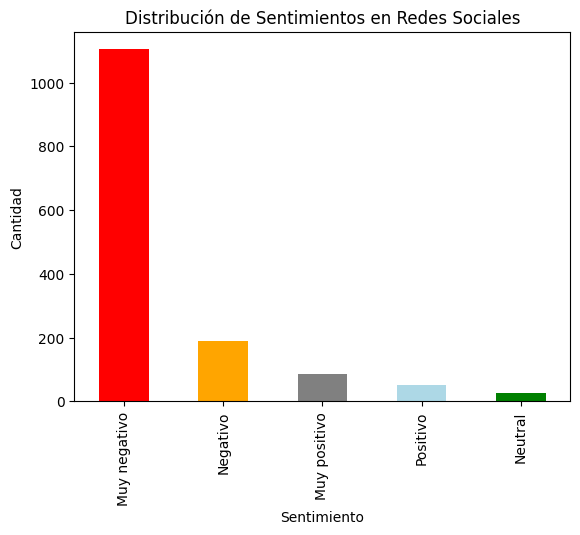

In [ ]:
# Contar cuántos comentarios de cada tipo hay
sentiment_counts = df['Sentimiento'].value_counts()

# Graficar distribución de análisis de sentimientos
sentiment_counts.plot(kind='bar', color=['red', 'orange', 'gray', 'lightblue', 'green'])
plt.title('Distribución de Sentimientos en Redes Sociales')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.show()


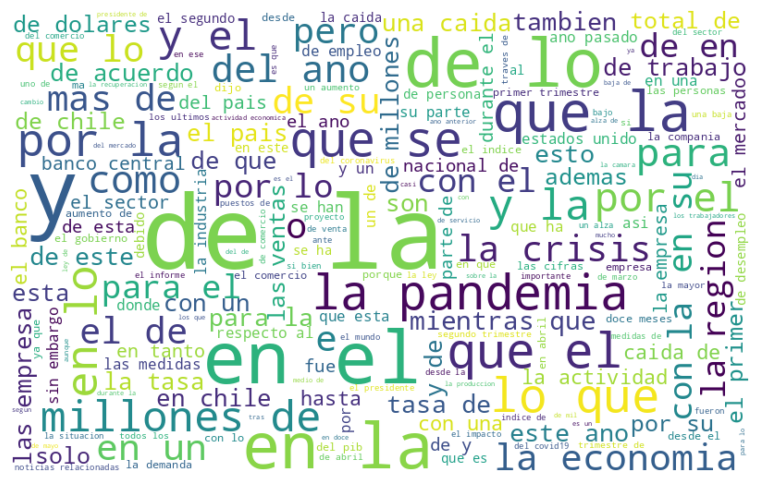

In [ ]:
# Generar una nube de palabras
all_words = ' '.join([text for text in df['Cleaned_Text']])
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color='white').generate(all_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()